In [7]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:
output_dir = Path.home() / 'RANCZLAB-NAS/allensdk_ecephys_data'
cache = EcephysProjectCache.from_warehouse(manifest=output_dir / 'manifest.json')

session_id = 719161530
session = cache.get_session_data(session_id)

In [3]:
session.running_speed

,start_time,end_time,velocity
0,29.77937,29.79390,-0.375017
1,29.79390,29.81039,3.825516
2,29.82680,29.84451,-0.942946
3,29.84451,29.85961,-1.594519
4,29.87652,29.89318,1.059689
...,...,...,...
365060,9211.41096,9211.42868,-0.425930
365061,9211.42868,9211.44444,-0.595552
365062,9211.46100,9211.47783,1.332825
365063,9211.47783,9211.49440,0.067691


In [9]:
running_speed_midpoints = session.running_speed["start_time"] + (session.running_speed["end_time"] - session.running_speed["start_time"]) / 2
time_velocity_df = pd.concat([running_speed_midpoints, session.running_speed["velocity"]],axis=1,keys=['running_speed_midpoint','velocity'])
time_velocity_df

,running_speed_midpoint,velocity
0,29.786635,-0.375017
1,29.802145,3.825516
2,29.835655,-0.942946
3,29.852060,-1.594519
4,29.884850,1.059689
...,...,...
365060,9211.419820,-0.425930
365061,9211.436560,-0.595552
365062,9211.469415,1.332825
365063,9211.486115,0.067691


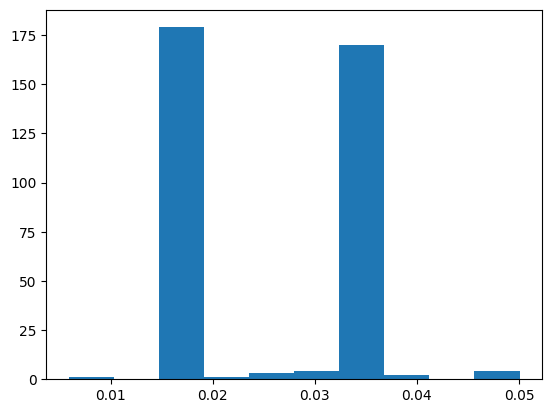

In [12]:
diffs = []
for i in range(1,time_velocity_df.shape[0]//1000):
    diffs.append(list(time_velocity_df["running_speed_midpoint"])[i]-list(time_velocity_df["running_speed_midpoint"])[i-1])

plt.hist(diffs)
plt.show()

In [ ]:
# FUNCTIONS
def generate_acceleration_and_velocity(samples, initial_velocity = 1):
    
    acceleration = np.around(np.random.normal(0,1, samples), 2)
    
    velocity = [initial_velocity]
    const = 0.1
    for i in range(acceleration.shape[0]):
        velocity.append(velocity[-1] + const*acceleration[i])
    
    return acceleration, velocity

def generate_variable_sine(samples, velocity):
    def get_freq_per_sample(rad_angle, dt):
        return 2 * np.pi * rad_angle * dt

    t = np.linspace(0, 1, samples)
    dt = t[1]-t[0]
    # print(dt)
    y = list()
    phi = 0
    for i in range(t.shape[0]):
        c = np.cos(phi)
        y.append(c)
        phi = phi + get_freq_per_sample(10*velocity[i], dt)
    return t, y